In [596]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
import os
import random

In [2]:
from os import listdir
from PIL import Image
import numpy as np

In [3]:
data_dir='C:/Users/Yang Xu/Downloads/CAFE/CAFE/'

In [4]:
def load_data(data_dir='C:/Users/Yang Xu/Downloads/CAFE/CAFE/'):
	""" Load all PGM images stored in your data directory into a list of NumPy
	arrays with a list of corresponding labels.

	Args:
		data_dir: The relative filepath to the CAFE dataset.
	Returns:
		images: A list containing every image in CAFE as an array.
		labels: A list of the corresponding labels (filenames) for each image.
	"""
	# Get the list of image file names
	all_files = listdir(data_dir)

	# Store the images as arrays and their labels in two lists
	images = []
	labels = []

	for file in all_files:
		# Load in the files as PIL images and convert to NumPy arrays
		img = Image.open(data_dir + file)
		images.append(np.array(img,dtype = float))
		labels.append(file)

	print("Total number of images:", len(images), "and labels:", len(labels))

	return images, labels

In [5]:
images, labels = load_data(data_dir='C:/Users/Yang Xu/Downloads/CAFE/CAFE/')

Total number of images: 80 and labels: 80


In [6]:
images

[array([[105., 105., 104., ..., 127., 128., 132.],
        [108., 106., 104., ..., 133., 131., 128.],
        [106., 105., 104., ..., 138., 134., 131.],
        ...,
        [223., 223., 223., ..., 190., 190., 190.],
        [223., 223., 223., ..., 190., 190., 190.],
        [223., 223., 223., ..., 190., 190., 190.]]),
 array([[163., 163., 163., ..., 117., 119., 123.],
        [163., 163., 162., ..., 122., 121., 120.],
        [163., 162., 162., ..., 124., 122., 119.],
        ...,
        [154., 154., 154., ..., 187., 188., 190.],
        [154., 154., 154., ..., 188., 189., 190.],
        [154., 154., 154., ..., 188., 190., 191.]]),
 array([[155., 155., 155., ..., 108., 111., 113.],
        [155., 155., 155., ..., 104., 106., 108.],
        [155., 155., 155., ..., 101., 103., 103.],
        ...,
        [146., 147., 147., ..., 177., 177., 175.],
        [147., 147., 147., ..., 177., 177., 177.],
        [148., 148., 148., ..., 177., 178., 178.]]),
 array([[119., 110., 106., ..., 138.,

In [7]:
def display_face(img):
	""" Display the input image and optionally save as a PNG.

	Args:
		img: The NumPy array or image to display

	Returns: None
	"""
	# Convert img to PIL Image object (if it's an ndarray)
	if type(img) == np.ndarray:
		print("Converting from array to PIL Image")
		img = Image.fromarray(img)

	# Display the image
	img.show()

In [8]:
type(images_new)

NameError: name 'images_new' is not defined

select data and build training and testing set

In [9]:
labels_new = labels.copy()
images_new = images.copy()
for item in labels_new:
    if '_n' in item:
        del images_new[labels_new.index(item)]
        labels_new.remove(item)
        
    if '_ht' in item:
        del images_new[labels_new.index(item)]
        labels_new.remove(item)

In [597]:
len(labels_new),len(images_new)

(60, 60)

Split data into train and test set

In [11]:
def PCA(data, dims_rescaled_data=10):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    import numpy as NP
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = NP.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = NP.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return NP.dot(evecs.T, data.T).T, evals, evecs

In [12]:
def test_PCA(data, dims_rescaled_data=2):
    '''
    test by attempting to recover original data array from
    the eigenvectors of its covariance matrix & comparing that
    'recovered' array with the original data
    '''
    _ , _ , eigenvectors = PCA(data, dim_rescaled_data=2)
    data_recovered = NP.dot(eigenvectors, m).T
    data_recovered += data_recovered.mean(axis=0)
    assert NP.allclose(data, data_recovered)

In [13]:
def plot_pca(data):
    from matplotlib import pyplot as MPL
    clr1 =  '#2026B2'
    fig = MPL.figure()
    ax1 = fig.add_subplot(111)
    data_resc, data_orig = PCA(data)
    ax1.plot(data_resc[:, 0], data_resc[:, 1], '.', mfc=clr1, mec=clr1)
    MPL.show()

In [14]:
images_new = np.array(images_new)

In [700]:
images_new[5].shape

(380, 240)

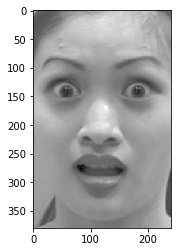

In [15]:
plt.imshow(images_new[5],cmap='gray')

In [222]:
images_new_vec=[]
for i in range(len(images_new)):
    images_new_vec.append(np.array(images_new[i]).flatten())

In [223]:
images_new_vec = np.array(images_new_vec)

In [224]:
# standarlization
images_new_vec = (images_new_vec-np.mean(images_new_vec))/np.std(images_new_vec)

In [225]:
images_new_vec.shape

(60, 91200)

In [21]:
emotion_dict = {"h": "happy", "ht": "happy with teeth", "m": "maudlin",
                "s": "surprise", "f": "fear", "a": "anger", "d": "disgust", "n": "neutral"}

In [356]:
def pca(dat, k=10):
    """
    PCA implementation.
    :param dat: Scaled training data in a 2d array of shape (# samples, # features)
    :param k: The desired number of dimensions in the rescaled data matrix
    :return: V of shape (# features, k), projected data of shape (# samples, k)
    """
    dat = dat.T

    # covariance matrix
    # C = np.cov(dat, rowvar=False)
    C = np.dot(dat.T, dat)

    # eigenvalues & eigenvectors
    evals, evecs = np.linalg.eigh(C)
    # use 'eigh' rather than 'eig' since R is symmetric,
    # the performance gain is substantial

    idx = np.argsort(evals)[::-1][:k]      # indices of eigenvalues in decreasing order
    evals = evals[idx]                     # sorted eigenvalues
    evecs = evecs[:, idx]                  # the corresponding eigenvalues

    return np.dot(dat, evecs / np.sqrt(evals)), evecs * np.sqrt(evals)
    # V = X.T * U * inv(X), X * V = U * S



In [266]:
images_new_vec

array([[-1.25066687, -1.25066687, -1.28241774, ...,  1.44815746,
         1.44815746,  1.44815746],
       [ 0.59088385,  0.59088385,  0.59088385, ...,  1.38465571,
         1.44815746,  1.47990833],
       [ 0.33687685,  0.33687685,  0.33687685, ...,  1.03539609,
         1.06714696,  1.06714696],
       ...,
       [-1.79043173, -1.75868086, -1.82218261, ..., -1.09191249,
        -1.09191249, -0.99665987],
       [-0.52039676, -0.45689501, -0.39339326, ...,  3.09920292,
         3.09920292,  3.09920292],
       [-0.29814063, -0.04413364,  0.11462073, ...,  3.09920292,
         3.09920292,  3.09920292]])

In [279]:
rotation, images_pca, vec = pca(images_new_vec, 10)
pca(images_new_vec, 10)

(array([[-7.85437820e-03, -2.32262123e-03, -6.51603285e-04, ...,
         -4.79239776e-04,  6.87170387e-04, -8.71107589e-03],
        [-7.86445299e-03, -2.04343435e-03, -9.63348706e-04, ...,
         -7.45395631e-04, -2.70737099e-05, -8.60903330e-03],
        [-7.81925494e-03, -1.69510893e-03, -1.19195530e-03, ...,
         -1.14340753e-03, -5.68483280e-04, -8.31111264e-03],
        ...,
        [-3.56832279e-03, -6.67031978e-03,  1.12751590e-02, ...,
         -5.39708139e-03, -9.28846015e-03,  3.51550256e-03],
        [-3.67306283e-03, -6.62750381e-03,  1.18072992e-02, ...,
         -6.02716865e-03, -8.39798122e-03,  3.41635913e-03],
        [-3.58351046e-03, -6.58103749e-03,  1.16980128e-02, ...,
         -5.88594416e-03, -7.55142676e-03,  3.01351536e-03]]),
 array([[ 1.00779122e+02, -2.06406616e+02,  5.16702660e+01,
         -4.73646167e+01,  1.08181466e+02, -3.28249486e-01,
          1.19533742e+01,  3.17043955e+01,  3.94333537e+01,
         -6.90153024e+01],
        [ 1.29389500e+

In [280]:
vec.shape

(60, 10)

In [26]:
def pca_on_splits(data_splits, k=10):
    """

    :param data_splits:
    :param k:
    :return:
    """
    transformed = []
    for dat in data_splits:
        train, hold, test, yTrain, yHold, yTest = dat
        V, XTrain = pca(train, k)
        XHold, XTest = np.dot(hold, V), np.dot(test, V)
        transformed.append([XTrain, XHold, XTest, yTrain, yHold, yTest])
    return transformed

In [27]:
a,b = [2],[3]

In [29]:
image_shape = images[0].shape

subjectMap = ['041', '043', '048ng', '027', '044', '037', '050', '018', '049', '036']

In [30]:
def plot_eigenfaces(train, emotions, k=10, num_egf=6):
    """
    Plotting the first several eigenfaces.
    :param train: Scaled training data of shape (# samples, # features)
    :param emotions
    :param k: Number of PCs
    :param num_egf: Number of eigenfaces.
    """
    V, _ = pca(train, k)

    ncol = 3
    nrow = int(np.ceil(num_egf / ncol))

    fig = plt.figure()
    for i in range(num_egf):
        img = V[:, i].reshape(image_shape)
        ax = fig.add_subplot(nrow, ncol, i + 1)
        ax.imshow(img, cmap=plt.cm.bone)
    if emotions is None:
        emotions = set(list(emotion_dict)) - {'ht', 'n'}

    emotions = [e[0].lower() for e in emotions]
    Emotions = [emotion_dict[e].capitalize() for e in emotions]  # Capitalized

    # fig.suptitle(f'The First {num_egf} Eigenfaces of PCA { }.')

    plt.savefig(f"C:/Users/Yang Xu/Documents/253 assignment1/img/eigenfaces_{'_'.join(emotions)}.png")
    plt.show()


In [31]:
train = images_new_vec[:40]

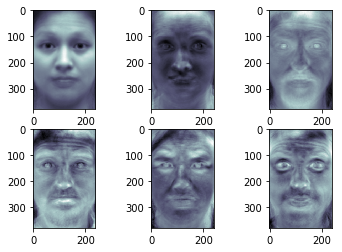

In [33]:
plot_eigenfaces(train, None, k=10, num_egf=6)

In [598]:
image_shape

(380, 240)

In [37]:
def train_hold_test_split(emotions=None, k=10):
    """
    :param emotions: The desired set of emotions for classification
    :param k:
    :return:
    """
    if emotions is None:
        emotions = list(set(emotion_dict) - {'ht', 'n'})
    else:
        emotions = list(set(emotions))

    images, labels, subjects = [], [], []
    for img, l in zip(rawImages, rawLabels):
        s, e = l.split('.')[0].split('_')
        e = e[:-1]
        if e in emotions:
            images.append(img.ravel())
            labels.append(emotions.index(e))
            subjects.append(s)
    images, labels = np.array(images), np.array(labels)

    # randomly generated indices for holdout subjects
    random.seed(10010)
    holdSubIdx = random.choices(range(len(subjectMap) - 1), k=len(subjectMap))

    data = []
    for s, h in zip(subjectMap, holdSubIdx):
        # The subject name for holdout data
        sub = subjectMap.copy()
        sub.remove(s)
        holdSub = sub[h]

        trainIdx, holdIdx, testIdx = [], [], []
        for i in range(len(labels)):
            if subjects[i] == s:
                testIdx.append(i)
            elif subjects[i] == holdSub:
                holdIdx.append(i)
            else:
                trainIdx.append(i)
        train, yTrain = images[trainIdx, ], labels[trainIdx]
        hold, yHold = images[holdIdx, ], labels[holdIdx]
        test, yTest = images[testIdx, ], labels[testIdx]

        # scaling
        mu, sigma = np.mean(train, 0), np.std(train, 0)
        train = (train - mu) / sigma
        hold = (hold - mu) / sigma
        test = (test - mu) / sigma

        data.append((train, hold, test, yTrain, yHold, yTest))

    text = [f"The training size: {len(data[0][3])}",
            f"The holdout size: {len(data[0][4])}",
            f"The test size: {len(data[0][5])}",
            f"Emotions: {', '.join([emotion_dict[e] for e in emotions])}"]
    print('\n'.join(text))

    return data, emotions

### 2. Logistic Regression

a. Implement logistic regression via gradient descent

In [526]:
q2_data, q2_emotions = train_hold_test_split(emotions=['f','s'], k=15)

The training size: 16
The holdout size: 2
The test size: 2
Emotions: surprise, fear


In [527]:
transformed = pca_on_splits(q2_data, k=15)

In [424]:
def logreg_10fold(transformed_data, max_epoch=10, alpha=0.001, intercept=False,
                  verbose=True):
    """
    Logistic regression on 10 different splits.
    """
    def logreg(dat):
        """
        Logistic regression implementation with batch gradient descent.
        """
        def add_intercept(X):
            a, b = X.shape
            X0 = np.ones((a, b + 1))
            X0[:, 1:] = X
            return X0

        def output(X, weight):
            return 1 / (1 + np.exp(-np.dot(X, weight)))

        def predict(X, weight):
            return output(X, weight) > 0.5

        def entropy(X, weight, target):
            out = output(X, weight)
            ent = [-t * np.log(y) - (1 - t) * np.log(1 - y) for t, y in zip(target, out)]
            return np.mean(ent)

        def gradient(X, weight, target):
            g = [np.dot(output(X, weight) - target, x) for x in X.T]
            return np.array(g)

        XTrain, XHold, XTest, yTrain, yHold, yTest = dat
        if intercept:
            XTrain, XHold, XTest = add_intercept(XTrain), add_intercept(XHold), add_intercept(XTest)

        ep = 0
        weights = [np.zeros(XTrain.shape[1])]              # initial weight
        holdEnt = [entropy(XHold, weights[-1], yHold)]     # initial holdout loss
        trainEnt = [entropy(XTrain, weights[-1], yTrain)]  # initial training loss
        while ep < max_epoch:
            ep += 1
            w = weights[-1]
            weights.append(w - alpha * gradient(XTrain, w, yTrain))
            holdEnt.append(entropy(XHold, weights[-1], yHold))
            trainEnt.append(entropy(XTrain, weights[-1], yTrain))

        ep = holdEnt.index(min(holdEnt))  # epoch number with minimum loss
        w = weights[ep]                   # the best weight

        accTest = sum(predict(XTest, w) == yTest) / len(yTest)

        return accTest, holdEnt, trainEnt, ep

    allAcc, allHoldEnt, allTrainEnt, numEpoch = [], [], [], []
    for dat in transformed_data:
        acc, h, t, ep = logreg(dat)
        allAcc.append(acc)
        allHoldEnt.append(h)
        allTrainEnt.append(t)
        numEpoch.append(ep)

    if verbose:
        print('Test accuracy:', np.mean(allAcc))

    return {'ACC': allAcc,
            'Holdout Loss': allHoldEnt,
            'Training Loss': allTrainEnt,
            'Best Epoch': numEpoch}


In [425]:
def logreg_tune(transformed_data, alpha_list=None, plot=False, intercept=False):
    """
    Tuning for leanring rate.
    """
    if alpha_list is None:
        alpha_list = [0.0001, 0.00005, 0.00001, 0.0000005, 0.000001]

    ACC = []
    for a in alpha_list:
        results = logreg_10fold(transformed_data, alpha=a, verbose=False, intercept=intercept)
        ACC.append(np.mean(results['ACC']))  # averaged test acc over 10 runs
    bestAlpha = [a for a, acc in zip(alpha_list, ACC) if acc == max(ACC)]

    text = [f"alpha = {a}, test acc = {acc}" for a, acc in zip(alpha_list, ACC)]
    text.append(f"Best alpha: {' and '.join([str(a) for a in bestAlpha])}")
    print('\n'.join(text))

    if plot:
        plt.plot(alpha_list, ACC)
        plt.xlabel('alpha (learning rate)')
        plt.ylabel('test accuracy')
        plt.title(f"Logistic Regression")

        plt.show()

    return bestAlpha

In [517]:
def plot_logreg_loss(holdout_loss, training_loss, emotions, alpha):
    """
    Cross-entropy loss over 10 training epochs plot.
    """
    emotions = [e[0].lower() for e in emotions]
    Emotions = [emotion_dict[e].capitalize() for e in emotions]  # Capitalized

    hloss = np.array(holdout_loss)
    tloss = np.array(training_loss)

    fig = plt.figure(figsize=(5.5, 4), dpi=300)

    plt.plot(np.mean(hloss, 0))
    plt.plot(np.mean(tloss, 0))
    plt.legend(['Holdout Loss', 'Training Loss'])  # loc='upper left'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    titles = [f"Cross-entropy Loss of LogReg in {' vs '.join(Emotions)} Classification",
              f"with learning rate = {alpha}"]
    plt.title('\n'.join(titles), fontsize=13)

    plt.tight_layout()

    plt.savefig(f"C:/Users/Yang Xu/Documents/253 assignment1/img/loss_logreg_{'_'.join(emotions)}_{alpha}.png")
    plt.show()

    print('Standard deviation over 10 runs for 2, 4, 8 and 10 epochs:')
    cols = [2, 4, 8, 10]
    print('Training:', np.std(tloss[:, cols], 0))
    print('Holdout:', np.std(hloss[:, cols], 0))
    
    plt.plot([2, 4, 8, 10],np.std(tloss[:, cols], 0))
    plt.plot([2, 4, 8, 10],np.std(hloss[:, cols], 0))
    plt.legend(['Training std', 'Holdout std'])  # loc='upper left'
    plt.xlabel('Epoch')
    plt.ylabel('Standard deviation')
    titles = [f"Standard deviation of loss in {' vs '.join(Emotions)} Classification",
              f"with learning rate = {alpha}"]
    plt.title('\n'.join(titles), fontsize=11.5)
    plt.tight_layout()

    plt.savefig(f"C:/Users/Yang Xu/Documents/253 assignment1/img/std_logreg_{'_'.join(emotions)}_{alpha}.png")
    plt.show()


In [ ]:
def plot_logreg_loss1(training_loss, emotions, alpha):
    """
    Cross-entropy loss over 10 training epochs plot.
    """
    emotions = [e[0].lower() for e in emotions]
    Emotions = [emotion_dict[e].capitalize() for e in emotions]  # Capitalized

    tloss = np.array(training_loss)

    fig = plt.figure(figsize=(5.5, 4), dpi=300)
    plt.plot(np.mean(tloss, 0))
    plt.legend('Training Loss')  # loc='upper left'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    titles = [f"Cross-entropy Loss of LogReg in {' vs '.join(Emotions)} Classification",
              f"with learning rate = {alpha}"]
    plt.title('\n'.join(titles), fontsize=11.5)

    plt.tight_layout()

    plt.savefig(f"C:/Users/Yang Xu/Documents/253 assignment1/img/loss_logreg_{'_'.join(emotions)}_{alpha}.png")
    plt.show()

    print('Standard deviation over 10 runs for epochs:')
    cols = [1,2, 3,4, 5,6,7,8,9, 10]
    print('Training:', np.std(tloss[:, cols], 0))
    print('Holdout:', np.std(hloss[:, cols], 0))
    
    plt.plot(cols,np.std(tloss[:, cols], 0))
    plt.legend('Training std')  # loc='upper left'
    plt.xlabel('Epoch')
    plt.ylabel('Standard deviation')
    titles = [f"Standard deviation of loss in {' vs '.join(Emotions)} Classification",
              f"with learning rate = {alpha}"]
    plt.title('\n'.join(titles), fontsize=11.5)
    plt.tight_layout()

    plt.savefig(f"C:/Users/Yang Xu/Documents/253 assignment1/img/std_logreg_{'_'.join(emotions)}_{alpha}.png")
    plt.show()


In [530]:
np.std([0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0])

0.22912878474779197

In [514]:
hold = logreg_10(transformed, max_epoch=10, alpha=0.000001)['Holdout Loss']
train =logreg_10(transformed, max_epoch=10, alpha=0.000001)['Training Loss']

Test accuracy: 0.7
Test accuracy: 0.7


alpha = 0.0001, test acc = 0.55
alpha = 5e-05, test acc = 0.5
alpha = 1e-05, test acc = 0.7
alpha = 5e-07, test acc = 0.7
alpha = 1e-06, test acc = 0.7
Best alpha: 1e-05 and 5e-07 and 1e-06


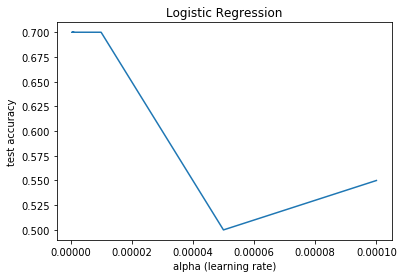

[1e-05, 5e-07, 1e-06]

In [515]:
logreg_tune(transformed, alpha_list=None, plot=True, intercept=False)

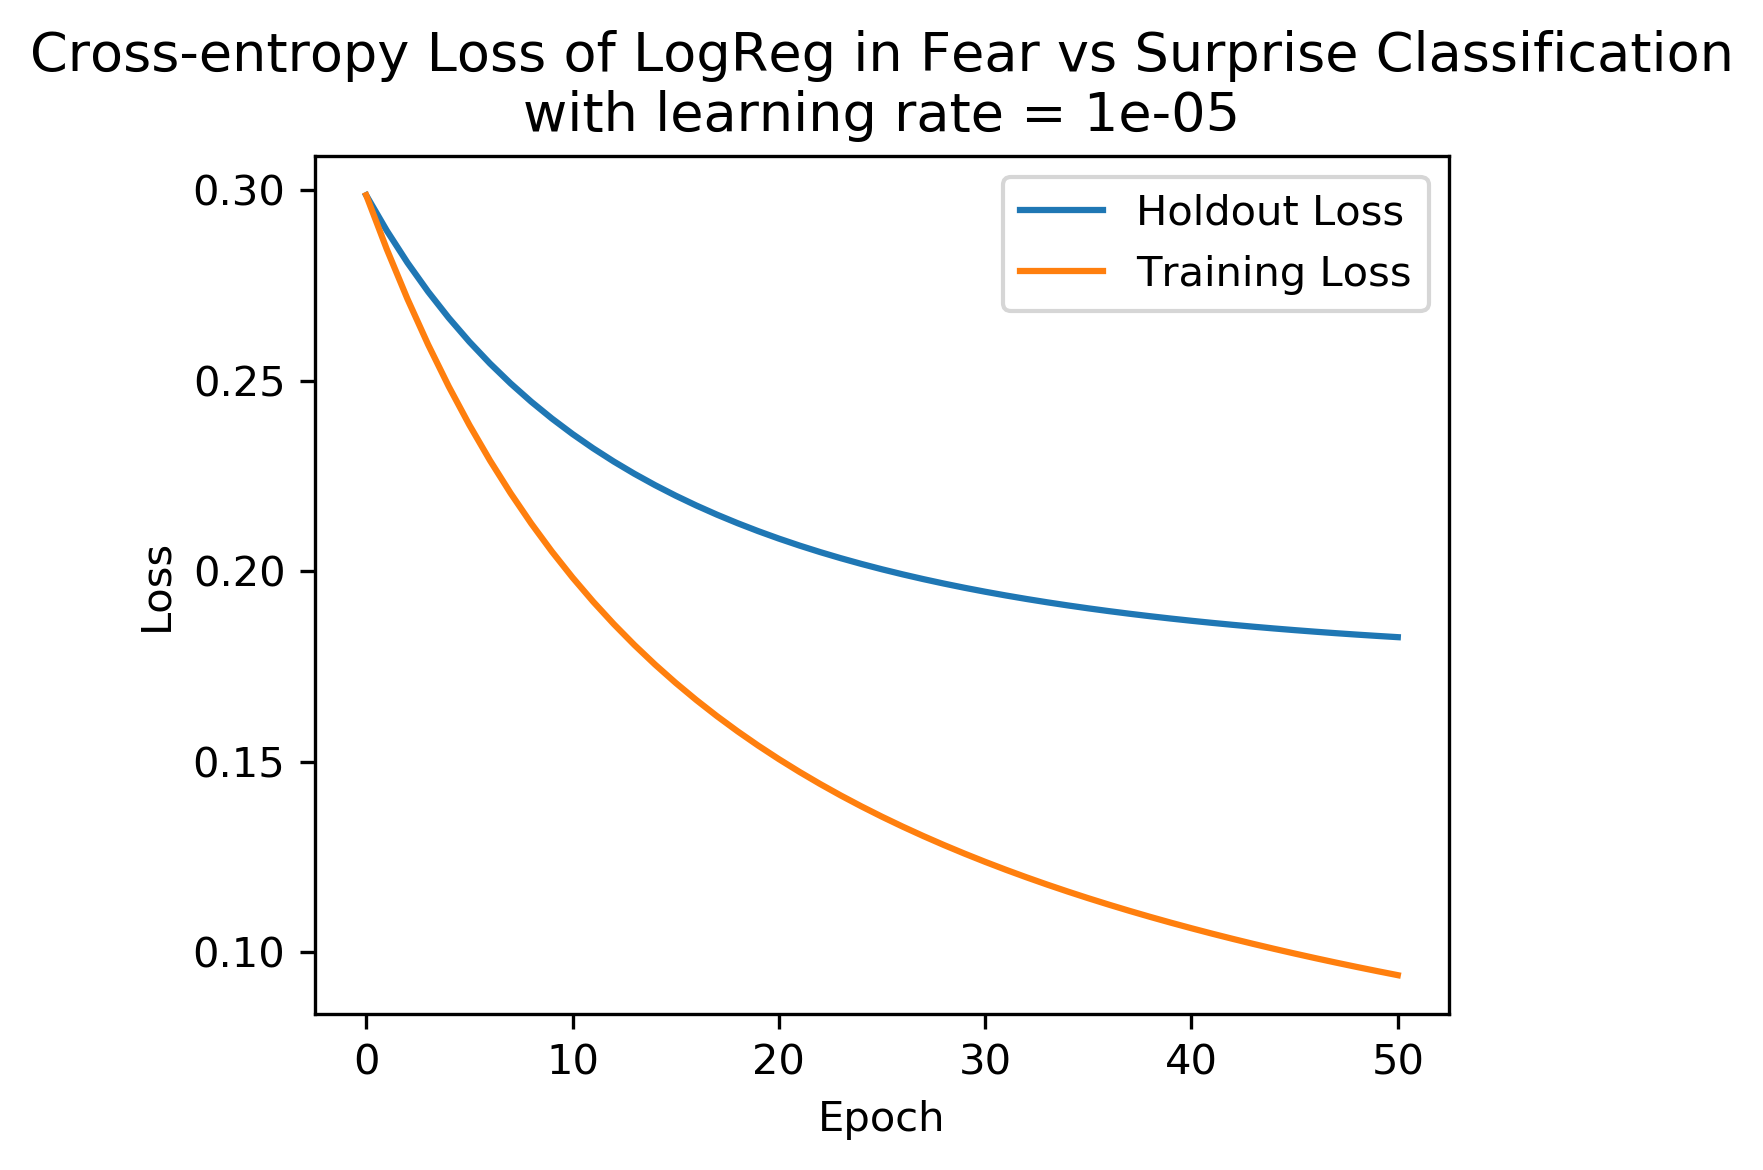

Standard deviation over 10 runs for 2, 4, 8 and 10 epochs:
Training: [0.00136106 0.00237258 0.00363881 0.00402438]
Holdout: [0.00313161 0.00554203 0.00909535 0.01043883]


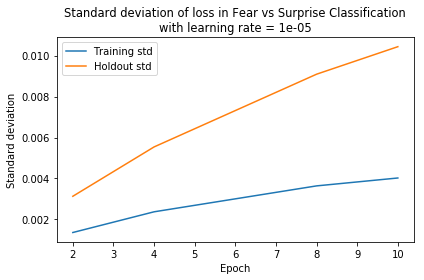

In [599]:
plot_logreg_loss(hold, train, ['f','s'], alpha = 0.00001)

Text(0.5,1,'Standard deviation vs epochs of happy and maudlin')

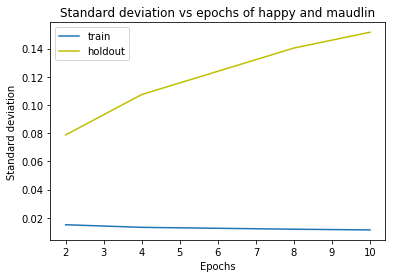

In [521]:
cols = [2, 4, 8, 10]
legend = ['train','holdout']
std_train = list(std_train)
std_hold = list(std_hold)
plt.plot(cols,std_train)
plt.plot(cols,std_hold,color = 'y')
plt.legend(legend)
plt.xlabel('Epochs')
plt.ylabel('Standard deviation')
plt.title('Standard deviation vs epochs of happy and maudlin')

In [520]:
np.std([1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0])

0.2

In [490]:
# data to plot
q2_data, q2_emotions = train_hold_test_split(emotions=['h','m'], k=5)
transformed = pca_on_splits(q2_data, k=5)
train1,train2,train3 = [],[],[]
train1 = logreg_10(transformed, max_epoch=10, alpha = 0.00005)['Training Loss']
train2 = logreg_10(transformed, max_epoch=10, alpha = 0.00001)['Training Loss']
train3 = logreg_10(transformed, max_epoch=10, alpha = 0.000001)['Training Loss']


The training size: 16
The holdout size: 2
The test size: 2
Emotions: happy, maudlin
Test accuracy: 0.85
Test accuracy: 0.85
Test accuracy: 0.85


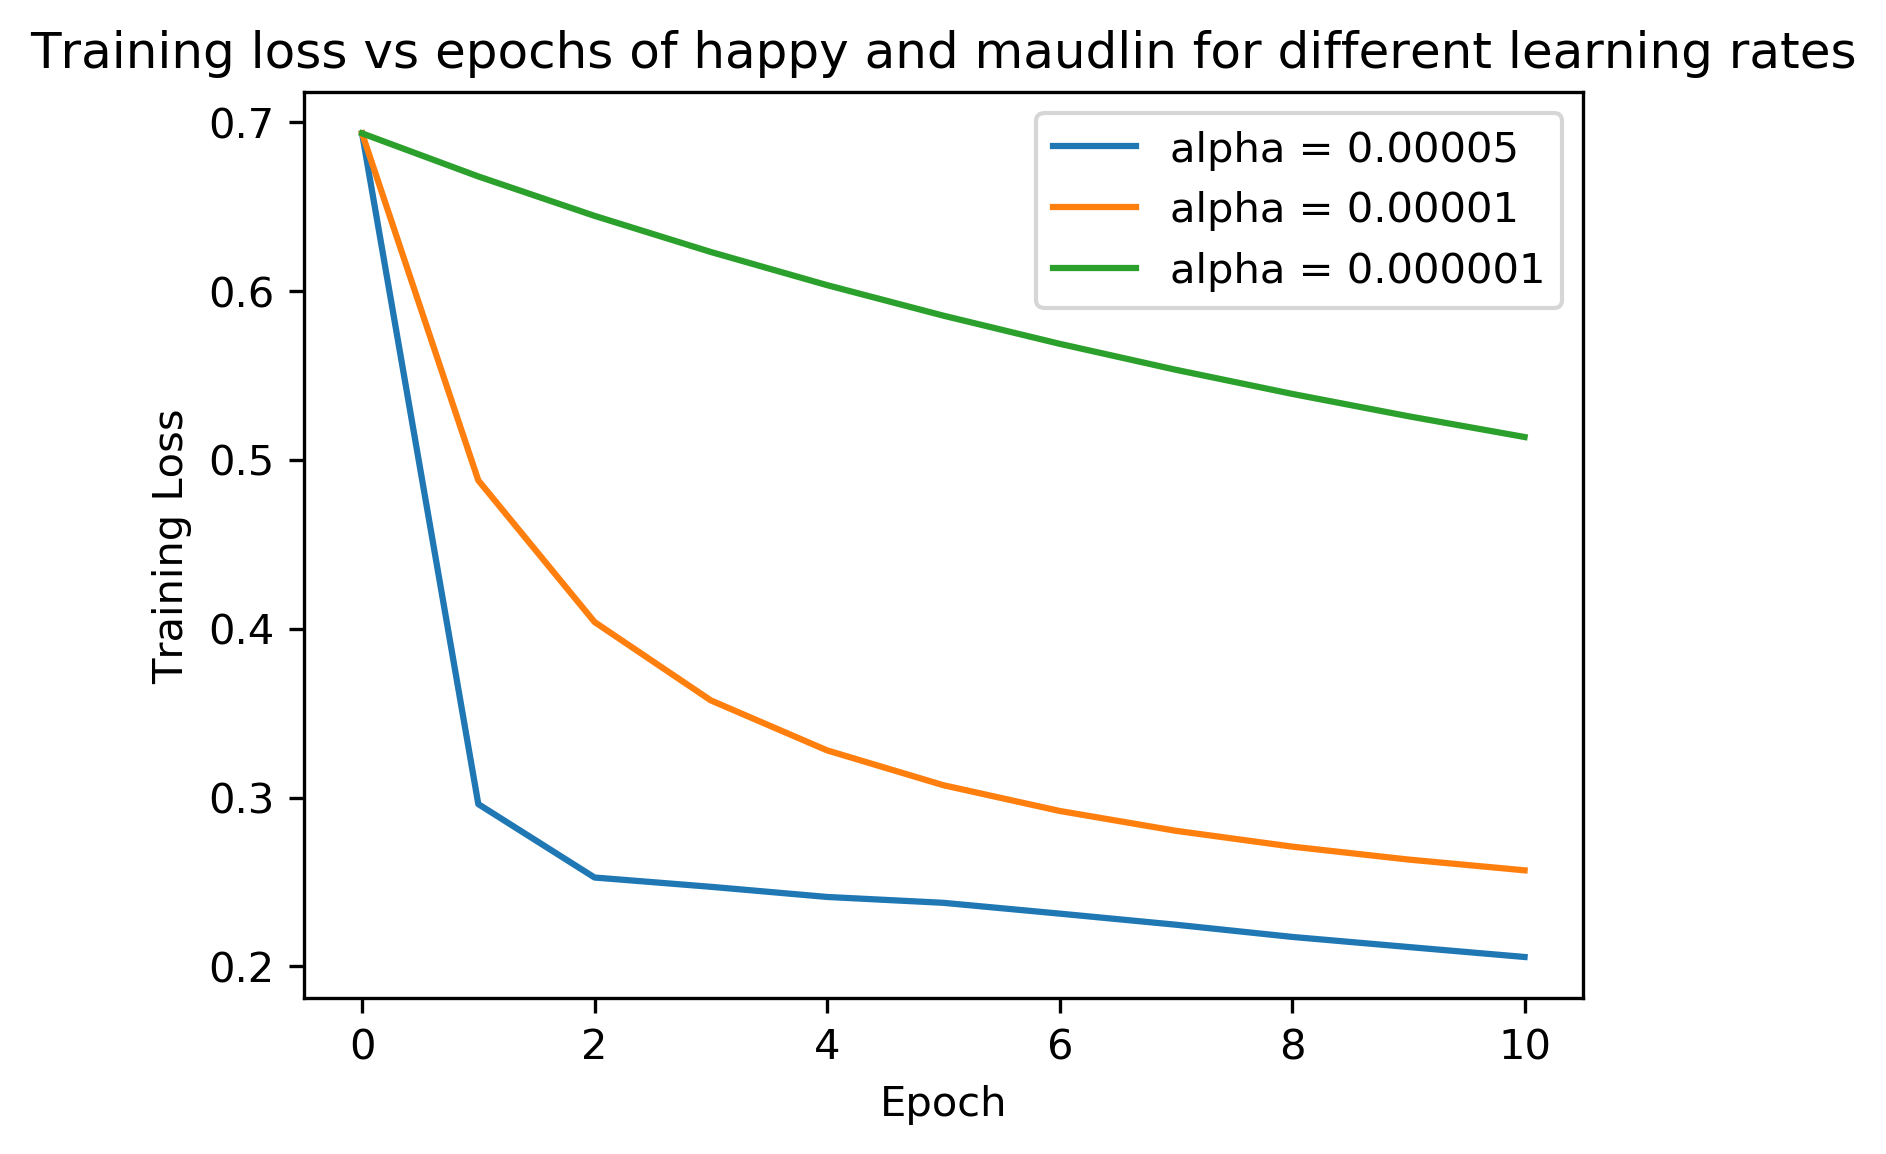

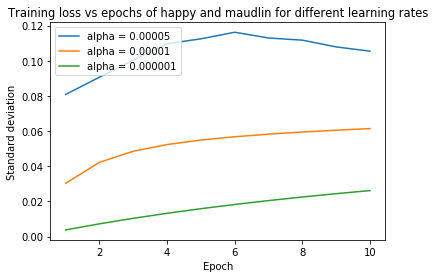

In [501]:
emotions = [e[0].lower() for e in emotions]
Emotions = [emotion_dict[e].capitalize() for e in emotions]  # Capitalized


fig = plt.figure(figsize=(5.5, 4), dpi=300)
#for i in range(3):
tloss1 = np.array(train1)
tloss2 = np.array(train2)
tloss3 = np.array(train3)

plt.plot(np.mean(tloss1, 0))
plt.plot(np.mean(tloss2, 0))
plt.plot(np.mean(tloss3, 0))

plt.legend(['alpha = 0.00005','alpha = 0.00001','alpha = 0.000001'])  # loc='upper left'
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training loss vs epochs of happy and maudlin for different learning rates')
plt.show()
cols = [1,2, 3,4, 5,6,7,8,9, 10]

plt.plot(cols,np.std(tloss1[:, cols], 0))
plt.plot(cols,np.std(tloss2[:, cols], 0))
plt.plot(cols,np.std(tloss3[:, cols], 0))

plt.legend(['alpha = 0.00005','alpha = 0.00001','alpha = 0.000001'])  # loc='upper left'
plt.xlabel('Epoch')
plt.ylabel('Standard deviation')
titles = ['Training loss vs epochs of happy and maudlin for different learning rates']
plt.title('\n'.join(titles), fontsize=11.5)
#plt.tight_layout()

#plt.savefig(f"C:/Users/Yang Xu/Documents/253 assignment1/img/std_logreg_{'_'.join(emotions)}_{alpha}.png")
plt.show()


In [151]:
################################################################################
# Logistic regression & visualization                                          #
################################################################################

def logreg_10fold(transformed_data, max_epoch=10, alpha=0.001, verbose=True):
    """
    Logistic regression on 10 different splits.
    """
    def logreg(dat):
        """
        Logistic regression implementation with batch gradient descent
        :param dat: Tranformed data & labels
        :return:
        """

        def output(X, weight):
            return 1 / (1 + np.exp(-np.dot(X, weight)))

        def predict(X, weight):
            return output(X, weight) > 0.5

        def entropy(X, weight, target):
            out = output(X, weight)
            ent = [-t * np.log(y) - (1 - t) * np.log(1 - y) for t, y in zip(target, out)]
            return np.mean(ent)

        def gradient(X, weight, target):
            g = [np.dot(output(X, weight) - target, x) for x in X.T]
            return np.array(g)
        XTrain, XHold, XTest, yTrain, yHold, yTest = dat

        ep = 0
        weights = [np.zeros(XTrain.shape[1])]              # initial weight
        holdEnt = [entropy(XHold, weights[-1], yHold)]     # initial holdout loss
        trainEnt = [entropy(XTrain, weights[-1], yTrain)]  # initial training loss
        while ep < max_epoch:
            ep += 1
            w = weights[-1]
            weights.append(w - alpha * gradient(XTrain, w, yTrain))
            holdEnt.append(entropy(XHold, weights[-1], yHold))
            trainEnt.append(entropy(XTrain, weights[-1], yTrain))

        ep = holdEnt.index(min(holdEnt))  # epoch number with minimum loss
        w = weights[ep]                   # the best weight

        accTest = sum(predict(XTest, w) == yTest) / len(yTest)

        return accTest, holdEnt, trainEnt, ep,w

    allAcc, allHoldEnt, allTrainEnt, numEpoch ,allw= [], [], [], [],[]
    for dat in transformed_data:
        acc, h, t, ep , w= logreg(dat)
        allAcc.append(acc)
        allHoldEnt.append(h)
        allTrainEnt.append(t)
        numEpoch.append(ep)
        allw.append(w)

    if verbose:
        print('Test accuracy:', np.mean(allAcc))

    return {'ACC': allAcc,
            'Holdout Loss': allHoldEnt,
            'weights':allw,
            'Training Loss': allTrainEnt,
            'Best Epoch': numEpoch}



In [84]:
def logreg_tune(transformed_data, alpha_list=None, plot=False, emotions=None):
    """

    :param transformed_data:
    :param alpha_list:
    :param plot:
    :return:
    """
    if alpha_list is None:
        alpha_list = [0.0001, 0.00005, 0.00001, 0.0000005, 0.000001]

    ACC = []
    for a in alpha_list:
        results = logreg_10fold(transformed_data, alpha=a, verbose=False)
        ACC.append(np.mean(results['ACC']))  # averaged test acc over 10 runs
    bestAlpha = [a for a, acc in zip(alpha_list, ACC) if acc == max(ACC)]

    text = [f"alpha = {a}, test acc = {acc}" for a, acc in zip(alpha_list, ACC)]
    text.append(f"Best alpha: {' and '.join([str(a) for a in bestAlpha])}")
    print('\n'.join(text))

    if plot:
        # emotions = [emotion_dict[e[0].lower()] for e in emotions]

        plt.plot(alpha_list, ACC)
        plt.xlabel('alpha (learning rate)')
        plt.ylabel('test accuracy')
        # plt.title(f"Logistic Regression for {' vs '.join(emotions)} Classification")
        plt.title(f"Logistic Regression")

        plt.show()

    return bestAlpha


In [152]:
logreg_10fold(transformed, max_epoch=10, alpha=0.00001, verbose=True)

Test accuracy: 0.9


{'ACC': [1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0],
 'Best Epoch': [10, 10, 10, 10, 4, 10, 7, 10, 10, 10],
 'Holdout Loss': [[0.6931471805599453,
   0.6065058803999694,
   0.5612798599587915,
   0.5353412887131664,
   0.5197796988022209,
   0.5101229517345207,
   0.5040093217504409,
   0.5001274344541081,
   0.4977112219269457,
   0.49629177507707645,
   0.4955700328044387],
  [0.6931471805599453,
   0.49031339303184357,
   0.3969276400642071,
   0.3407576532814506,
   0.30232870425647856,
   0.27402386833057085,
   0.2521213502180643,
   0.23455625452741763,
   0.2200822021949275,
   0.2078989039512347,
   0.19746718202382926],
  [0.6931471805599453,
   0.4804379491353711,
   0.38700961305448306,
   0.33154293912460353,
   0.2938106703265508,
   0.26609252761623337,
   0.24468449098574427,
   0.22754582608084495,
   0.21344607735742369,
   0.2015946531065547,
   0.1914586377797812],
  [0.6931471805599453,
   0.5324268743851933,
   0.503932196765072,
   0.4934097555780914,
   0

alpha = 0.0001, test acc = 0.75
alpha = 5e-05, test acc = 0.9
alpha = 1e-05, test acc = 0.9
alpha = 5e-07, test acc = 0.85
alpha = 1e-06, test acc = 0.85
Best alpha: 5e-05 and 1e-05


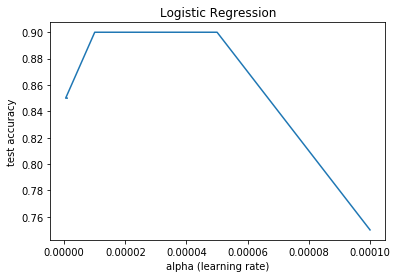

[5e-05, 1e-05]

In [209]:
logreg_tune(transformed, alpha_list=[0.0001, 0.00005, 0.00001, 0.0000005, 0.000001], plot=True, emotions=None)

In [ ]:
From the plot above, to high: \alpha = 0.0001,low:\alpha = 0.001,

c. Evaluate on Afraid vs Surprised

In [214]:
c_data, c_emotions = train_hold_test_split(emotions=['f','s'], k=10)

The training size: 16
The holdout size: 2
The test size: 2
Emotions: surprise, fear


In [215]:
c_transformed = pca_on_splits(c_data, k=10)

In [216]:
logreg_10fold(c_transformed, max_epoch=10, alpha=0.00001, verbose=True)

Test accuracy: 0.75


{'ACC': [1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0],
 'Best Epoch': [10, 10, 10, 5, 10, 10, 10, 10, 10, 10],
 'Holdout Loss': [[0.6931471805599453,
   0.6557911318092231,
   0.6359563877851793,
   0.6229462884993605,
   0.6138711608037497,
   0.6073308608187943,
   0.6025247589964953,
   0.5989618534061352,
   0.5963248930536778,
   0.594399494885867,
   0.5930350759703757],
  [0.6931471805599453,
   0.6073878772503822,
   0.5612319310388714,
   0.5313885359974688,
   0.510108012403888,
   0.493869030261957,
   0.4808487348484773,
   0.4700248742060871,
   0.4607867726166658,
   0.45274897826992866,
   0.4456557493759077],
  [0.6931471805599453,
   0.5565056277231887,
   0.5051101942602934,
   0.4798676797200777,
   0.4664010916745652,
   0.45892742411626536,
   0.45472895709396394,
   0.45241541324441303,
   0.4512318871574578,
   0.45074856671784574,
   0.4507105772473625],
  [0.6931471805599453,
   0.5451158001018668,
   0.4887072144347913,
   0.466639019367847,
   0.45931312

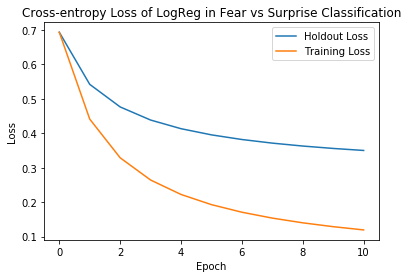

Standard deviation over 10 runs for 2, 4, 8 and 10 epochs:
Training: [0.01506368 0.0132034  0.01188156 0.01138313]
Holdout: [0.07880007 0.10745318 0.14043988 0.15164489]


In [217]:
std_train, std_hold = plot_logreg_loss(holdout_loss, training_loss, 'f','s')

3. Softmax Regression

data preprocessing

In [695]:
def softmax(dat, K, algorithm, alpha, max_epoch=50, return_dict=False):
    """
    Softmax regression with Batch or Stochastic gradient descent.
    Parameter dat should be a list of data splits (after transformation),
    algorithm can be 'batch' or 'stochastic'.
    """
    def one_hot(target):
        N = len(target)
        T = np.zeros((N, K), dtype=int)
        for i in range(N):
            T[i][target[i]] = 1
        return T  # shape (# samples, # classes)

    def output(X, W):
        Y = np.exp(np.dot(X, W))
        return Y / Y.sum(axis=1)[:, None]  # shape (# samples, # classes)

    def predict(X, W):
        return output(X, W).argmax(axis=1)

    def entropy(out, T):
        """
        Note: T is one-hot encoded target of shape (# samples, # PCs)
        """
        ent = np.log(out) * T
        
        return (-ent.sum() / ent.shape[0]) /ent.shape[1]

    def gradient(X, out, T):
        return np.dot(X.T, out - T)

    algorithm = algorithm[0].lower()

    XTrain, XHold, XTest, yTrain, yHold, yTest = dat
    YTrain, YHold, YTest = one_hot(yTrain), one_hot(yHold), one_hot(yTest)

    ep = 0
    weights = [np.zeros((XTrain.shape[1], K))]  # initial weight
    holdEnt = [entropy(output(XHold, weights[-1]), YHold)]  # initial holdout loss
    trainEnt = [entropy(output(XTrain, weights[-1]), YTrain)]  # initial training loss
    if algorithm == 's':
        permu = list(range(len(yTrain)))  # training sample indices
    while ep < max_epoch:
        ep += 1
        w = weights[-1]

        # Stochastic gradient descent
        if algorithm == 's':
            random.shuffle(permu)  # permutation of training sample indices
            for i in permu:
                a = np.array([XTrain[i]]).T
                b = np.array([output(XTrain, w)[i] - YTrain[i]])
                w -= alpha * np.dot(a, b)
            weights.append(w)

        # Batch gradient descent
        if algorithm == 'b':
            w -= alpha * gradient(XTrain, output(XTrain, w), YTrain)

        weights.append(w)
        holdEnt.append(entropy(output(XHold, weights[-1]), YHold))
        trainEnt.append(entropy(output(XTrain, weights[-1]), YTrain))

    ep = holdEnt.index(min(holdEnt))  # epoch number with minimum loss
    w = weights[ep]  # the best weight

    predTest = predict(XTest, w)
    accTest = sum(predTest == yTest) / len(yTest)

    # confusion matrix
    cm = np.zeros((K, K), dtype=int)
    for p, y in zip(predTest, yTest):
        cm[y, p] = 1

    if return_dict:
        return {'ACC': accTest, 'Holdout Loss': holdEnt, 'Training Loss': trainEnt,
                'Best Epoch': ep, 'Confusion': cm, 'Weight': w}
    else:
        return accTest, holdEnt, trainEnt, ep, cm, w


def softmax_cv(transformed_data, K, algorithm, alpha=0.00001, verbose=True):
    """
    Cross validation for softmax regression.

    :param transformed_data: A list of data splits.
    :param K: Number of classes.
    :param algorithm: 'batch' or 'stochastic'.
    :param alpha: Learning rate.
    :param verbose: Print the result or not.
    :return:
    """
    cv = len(transformed_data)  # Number of folds for cross-validation

    ACC, holdEnt, trainEnt, numEpoch, bestW = [], [], [], [], []
    confusion = np.zeros((K, K), dtype=int)
    for dat in transformed_data:
        acc, h, t, ep, cm, w = softmax(dat, K, algorithm, alpha)
        ACC.append(acc)
        holdEnt.append(h)
        trainEnt.append(t)
        numEpoch.append(ep)
        confusion += cm
        bestW.append(w)

    if verbose:
        text = [f'Test accuracy (averaged): {np.mean(ACC)}']
        print('\n'.join(text))

    return {'ACC': ACC, 'Holdout Loss': holdEnt, 'Training Loss': trainEnt,
            'Best Epoch': numEpoch, 'Confusion': confusion / cv, 'Weight': bestW}


def softmax_tune(transformed_data, K, algorithm, alpha_list=None, plot=False):
    """
    Tuning for learning rate.

    :param transformed_data: A list of data splits (transformed).
    :param K: Number of classes.
    :param algorithm: 'batch' or 'stochastic'.
    :param alpha_list: List of possible learning rates.
    :return: A list of optimal alpha(s).
    """
    if alpha_list is None:
        alpha_list = [5e-4, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6, 5e-7, 1e-7]

    ACC = []
    for a in alpha_list:
        result = softmax_cv(transformed_data, K, algorithm=algorithm, alpha=a, verbose=False)
        ACC.append(np.mean(result['ACC']))
    bestAlpha = [a for a, acc in zip(alpha_list, ACC) if acc == max(ACC)]

    text = [f"Best alpha: {' and '.join([str(a) for a in bestAlpha])}"]
    if not plot:
        text = [f"alpha = {a}, test acc = {acc}" for a, acc in zip(alpha_list, ACC)] + text
    print('\n'.join(text))

    if plot:
        plt.plot(np.log10(alpha_list), ACC)
        plt.xlabel('log10 alpha')
        plt.ylabel('test accuracy')
        plt.title("Softmax Regression")

        plt.show()

    return bestAlpha


def plot_softmax_loss(holdout_loss, training_loss, alpha, algorithm, num_pc,
                      identity_recognition=False):
    """
    Visualizing cross-entropy loss over 10 training epochs.

    :param holdout_loss: Nested list of holdout loss.
    :param training_loss: Nested list of training loss.
    :param alpha: Learning rate.
    :param algorithm: 'batch' or 'stochastic'.
    :param identity_recognition: Use this function for identity recognition or not.
    """
    hloss = np.array(holdout_loss)
    tloss = np.array(training_loss)

    plt.figure(figsize=(5.5, 4), dpi=300)

    plt.plot(np.mean(hloss, 0))
    plt.plot(np.mean(tloss, 0))
    plt.legend(['Holdout Loss', 'Training Loss'])  # loc='upper left'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    if identity_recognition:
        titles = [f'Cross-entropy Loss of Softmax Regression for 10 Identities']
    else:
        titles = [f'Cross-entropy Loss of Softmax Regression for 6 Emotions']
    titles += [f'with {algorithm} gradient descent, alpha = {alpha}',
               f'and number of components = {num_pc}']
    plt.title('\n'.join(titles), fontsize=11.5)

    plt.tight_layout()

    if identity_recognition:
        fname = f'{algorithm}_{alpha}_{num_pc}pc_identity.png'
    else:
        fname = f'{algorithm}_{alpha}_{num_pc}pc.png'
    plt.savefig('C:/Users/Yang Xu/Documents/253 assignment1/img/loss_softmax_' + fname)
    plt.show()

    print('Standard deviation over 10 runs for 10, 20, 30. 40, 50 epochs:')
    cols = [10, 20, 30, 40, 50]
    print('Training:', np.std(tloss[:, cols], 0))
    print('Holdout:', np.std(hloss[:, cols], 0))


In [691]:
def plot_batch_stochastic_loss(batch_loss, stochastic_loss, alpha, num_pc):
    """
    Visualizing training loss for softmax regression: Batch vs Stochastic.
    """
    bloss = np.array(batch_loss)
    sloss = np.array(stochastic_loss)

    plt.figure(figsize=(5.5, 4), dpi=300)

    plt.plot(np.mean(bloss, 0))
    plt.plot(np.mean(sloss, 0))
    plt.legend(['Training Loss - Batch', 'Training Loss - Stochastic'])  # loc='upper left'
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    titles = [f'Cross-entropy Loss of Softmax Regression for 6 Emotions',
              f'with learning rate = {alpha}, number of components = {num_pc}']
    plt.title('\n'.join(titles), fontsize=13)

    plt.tight_layout()

    plt.savefig(f'C:/Users/Yang Xu/Documents/253 assignment1/img/loss_softmax_compare_{alpha}_{num_pc}pc.png')
    plt.show()


def plot_softmax_weight(W, V, emotion_map=None, option='emotion'):
    """
    Visualizing the trained weights (for 6 emotions/10 identities).

    :param W: Trained weight array of shape (# PCs, # classes).
    :param V: Eigenvectors array of shape (# features, # PCs) from PCA.
    :param option: 'emotion' or 'identity'.
    """
    faces = np.dot(V, W).T

    if option=='emotion':
        fig = plt.figure(figsize=(5.5, 5.5), dpi=300)
        for i, f in enumerate(faces):
            img = (f - min(f)) / (max(f) - min(f)) * 255
            img = img.reshape(image_shape)
            ax = fig.add_subplot(2, 3, i + 1)
            ax.imshow(img, cmap=plt.cm.bone)
            plt.xticks([])
            plt.yticks([])
            plt.title(emotion_dict[emotion_map[i]])

    if option=='identity':
        fig = plt.figure(figsize=(5.5, 3.5), dpi=300)
        for i, f in enumerate(faces):
            img = (f - min(f)) / (max(f) - min(f)) * 255
            img = img.reshape(image_shape)
            ax = fig.add_subplot(2, 5, i + 1)
            ax.imshow(img, cmap=plt.cm.bone)
            plt.xticks([])
            plt.yticks([])
            plt.title(subjectMap[i])

    plt.savefig(f'./img/trained_{option}_faces.png')
    plt.show()


In [621]:
q3_data, q3_emotions = train_hold_test_split(emotions=None, k=10)
transformed_3 = pca_on_splits(q3_data, k=10)

The training size: 48
The holdout size: 6
The test size: 6
Emotions: happy, surprise, disgust, anger, fear, maudlin


In [698]:
hold = softmax_cv(transformed_3, K=6, algorithm = 'batch',alpha=0.000001, verbose=True)['Holdout Loss']
train = softmax_cv(transformed_3, K=6, algorithm = 'batch',alpha=0.000001, verbose=True)['Training Loss']

Test accuracy (averaged): 0.5666666666666667
Test accuracy (averaged): 0.5666666666666667


In [265]:
e

'Confusion'

Best alpha: 5e-07


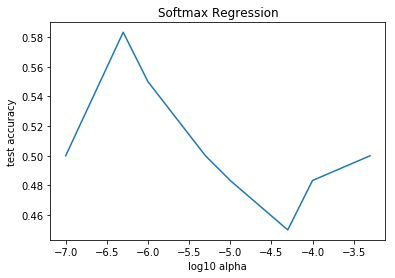

[5e-07]

In [697]:
softmax_tune(transformed_3, K = 10, algorithm = 'batch', alpha_list=None, plot=True)

Test accuracy (averaged): 0.5666666666666667
Test accuracy (averaged): 0.5666666666666667


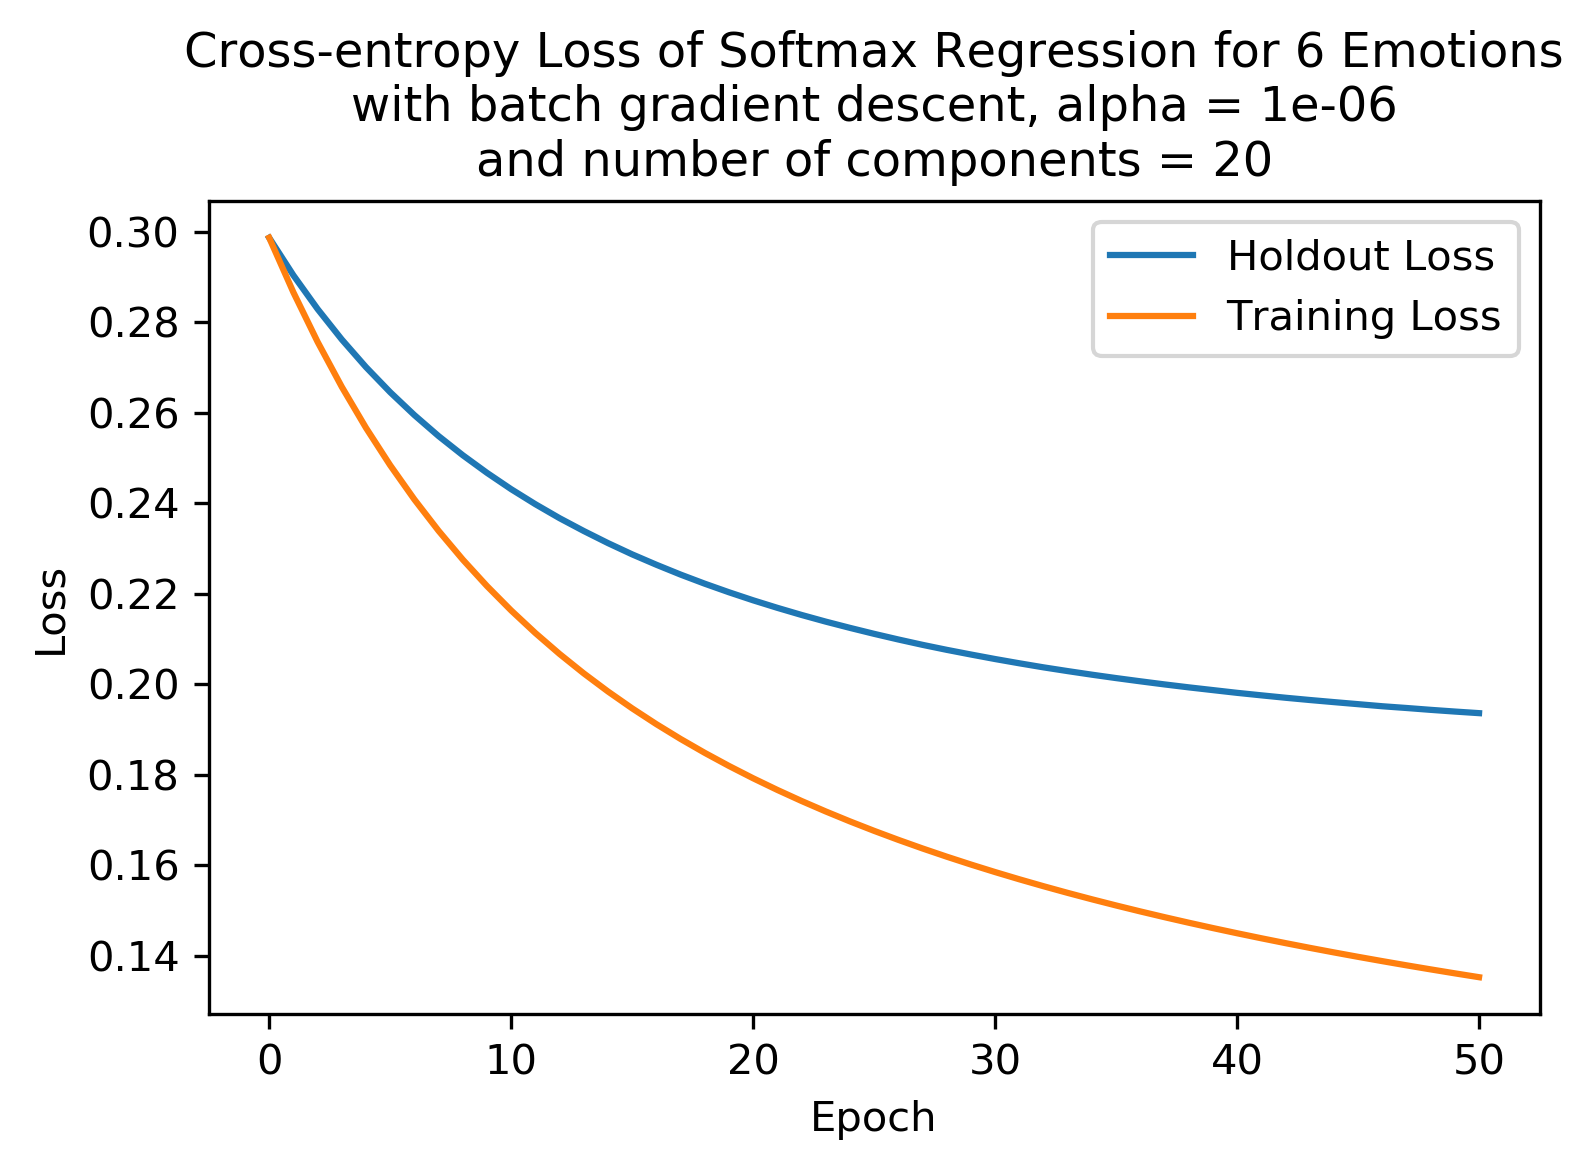

Standard deviation over 10 runs for 10, 20, 30. 40, 50 epochs:
Training: [0.00361628 0.0046497  0.00529031 0.0057841  0.00617087]
Holdout: [0.00905102 0.01326206 0.01610592 0.01836139 0.0204688 ]


In [696]:
hold = softmax_cv(transformed_3, K = 6, algorithm = 's', alpha=0.000001, verbose=True)['Holdout Loss']
test = softmax_cv(transformed_3, K = 6, algorithm = 's', alpha=0.000001, verbose=True)['Training Loss']
plot_softmax_loss(hold, train, alpha = 0.000001, algorithm = 'batch', num_pc = 20,
                      identity_recognition=False)

In [587]:
hold = np.array(hold)
aa = hold.reshape(10,51)

In [694]:
weight

'Weight'

In [589]:
test = np.array(test)
bb = test.reshape(10,51)

In [590]:
h_ep10,h_ep20,h_ep30,h_ep40,h_ep50 = [],[],[],[],[]
for i in range(10):
    h_ep10.append(aa[i][9])
    h_ep20.append(aa[i][19])
    h_ep30.append(aa[i][29])
    h_ep40.append(aa[i][39])
    h_ep50.append(aa[i][49])


In [591]:
t_ep10,t_ep20,t_ep30,t_ep40,t_ep50 = [],[],[],[],[]
for i in range(10):
    t_ep10.append(bb[i][9])
    t_ep20.append(bb[i][19])
    t_ep30.append(bb[i][29])
    t_ep40.append(bb[i][39])
    t_ep50.append(bb[i][49])

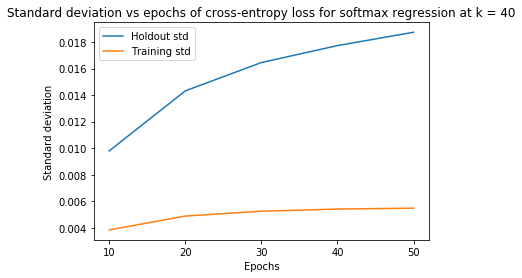

In [592]:
plt.plot(['10','20','30','40','50'],[np.std(h_ep10),np.std(h_ep20),np.std(h_ep30),np.std(h_ep40),np.std(h_ep50)])
plt.plot(['10','20','30','40','50'],[np.std(t_ep10),np.std(t_ep20),np.std(t_ep30),np.std(t_ep40),np.std(t_ep50)])
plt.xlabel('Epochs')
plt.ylabel('Standard deviation')
plt.title('Standard deviation vs epochs of cross-entropy loss for softmax regression at k = 40')
plt.legend(['Holdout std', 'Training std'])  # loc='upper left'

plot comparison between batch and stochastic in training loss

In [674]:
q3_data, q3_emotions = train_hold_test_split(emotions=None, k=10)
transformed_3 = pca_on_splits(q3_data, k=10)

The training size: 48
The holdout size: 6
The test size: 6
Emotions: happy, surprise, disgust, anger, fear, maudlin


In [679]:
train_batch = softmax_cv(transformed_3, K = 6, algorithm = 'b', alpha=0.00005, verbose=True)['Training Loss']
train_sto = softmax_cv(transformed_3, K = 6, algorithm = 's', alpha=0.00005, verbose=True)['Training Loss']

Test accuracy (averaged): 0.45
Test accuracy (averaged): 0.5333333333333333


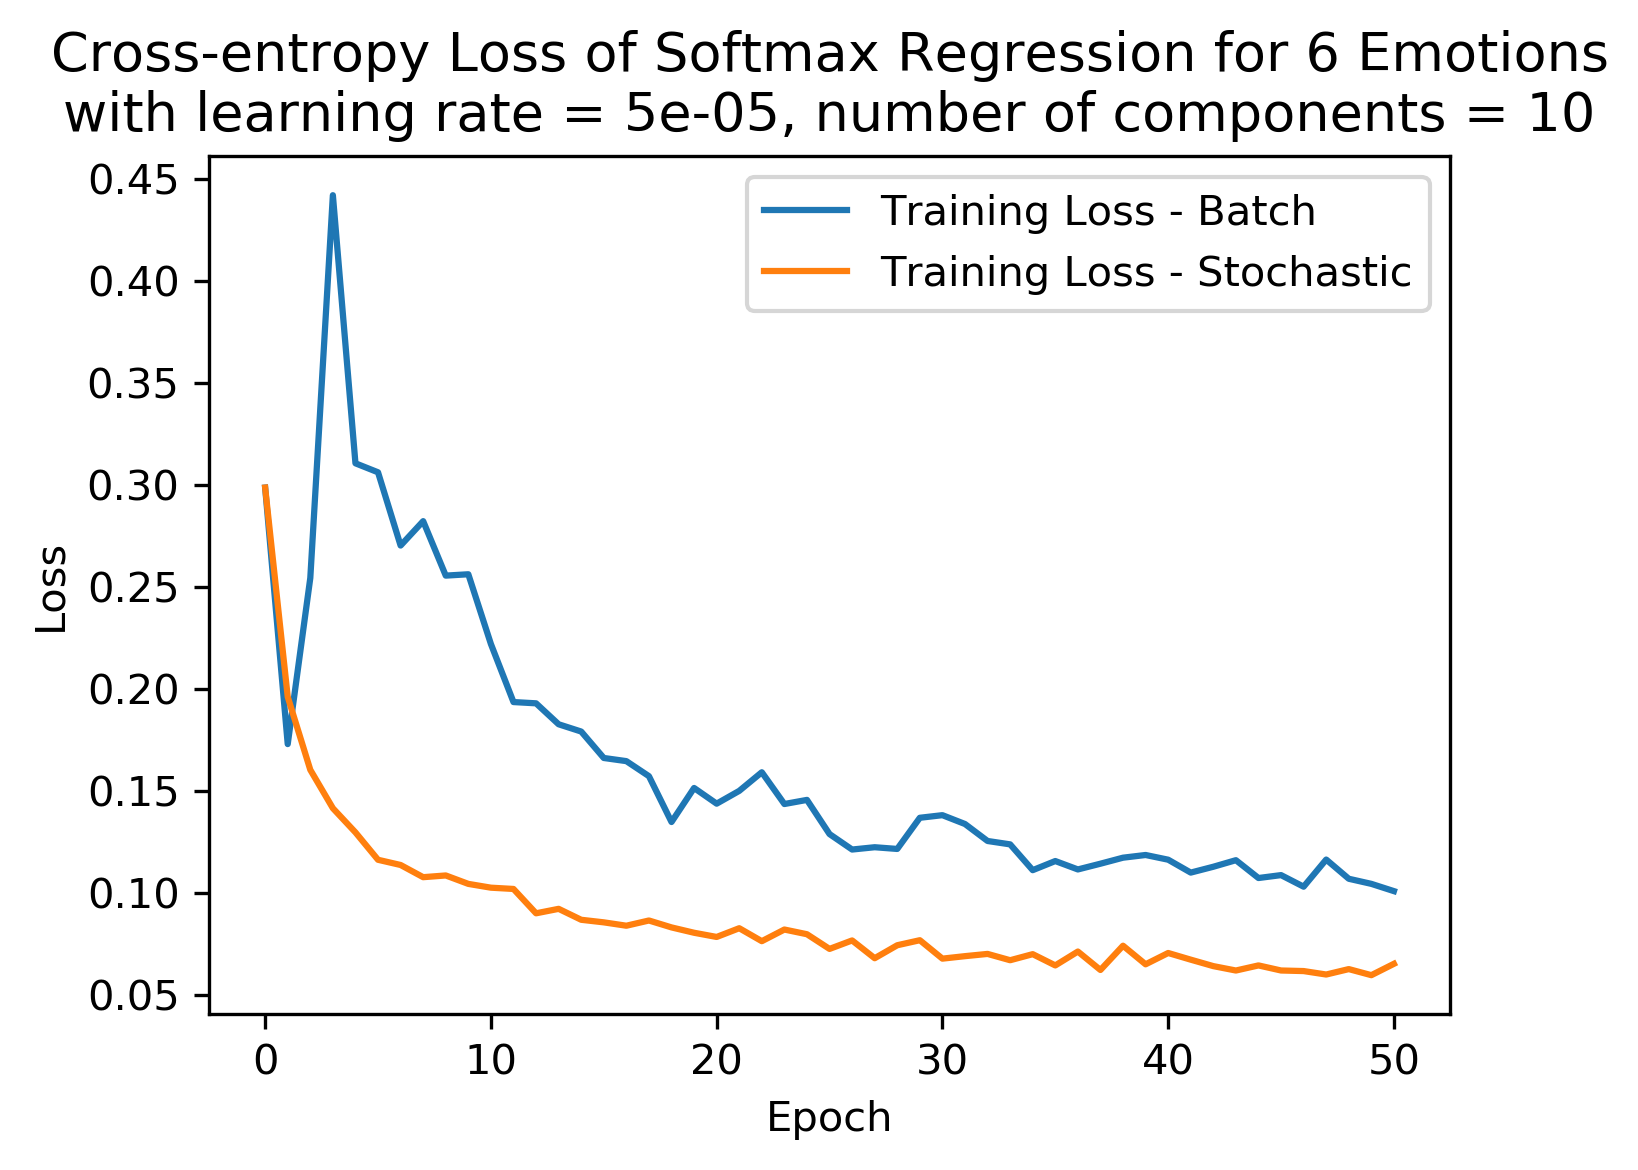

In [699]:
plot_batch_stochastic_loss(train_batch, train_sto, alpha = 0.00005, num_pc = 10)